In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
# Read in 4 sample data files
muscles = [0,0,0,0]
muscles[0] = pd.read_csv("GSM3746212_Muscle_1_Counts.csv")
muscles[1] = pd.read_csv("GSM3746213_Muscle_2_Counts.csv")
muscles[2] = pd.read_csv("GSM3746214_Muscle_3_Counts.csv")
muscles[3] = pd.read_csv("GSM3746215_Muscle_4_Counts.csv")

In [18]:
# Combine all sample data files
gene_expression = muscles[0]

for i in muscles[1:3]:
    gene_expression = gene_expression.merge(i, on = 'Unnamed: 0')

In [19]:
# Rename the first column as gene
gene_expression.rename(columns = {'Unnamed: 0': 'Gene'}, inplace = True)

In [20]:
# Read in cell types file
celltypes = pd.read_excel('41598_2019_57110_MOESM4_ESM.xlsx', header = 0)
celltypes.columns = celltypes.iloc[0]
celltypes = celltypes.reindex(celltypes.index.drop(0)).reset_index(drop=True)

In [21]:
# Drop non-numeric columns and store the cell types in a variable
X = gene_expression.merge(celltypes, on = 'Gene')
X = X.drop(columns=['Gene'])
cell_types = X['Cell-type']
gene_expression_data = X.drop('Cell-type', axis = 1)

In [22]:
# Perform log transformation on data
pseudocount = 1 
gene_expression_data += pseudocount
gene_expression_data = gene_expression_data / gene_expression_data.sum(axis=1)[:,np.newaxis]
gene_expression_data = np.log2(gene_expression_data)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
pca_result = pca.fit_transform(gene_expression_data)

C:\Users\bryan\AppData\Local\Temp\ipykernel_5500\3566050603.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gene_expression_data = gene_expression_data / gene_expression_data.sum(axis=1)[:,np.newaxis]


In [23]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne1', 'tsne2'])
tsne_df['cell_type'] = cell_types  # Adding the cell types to the t-SNE results

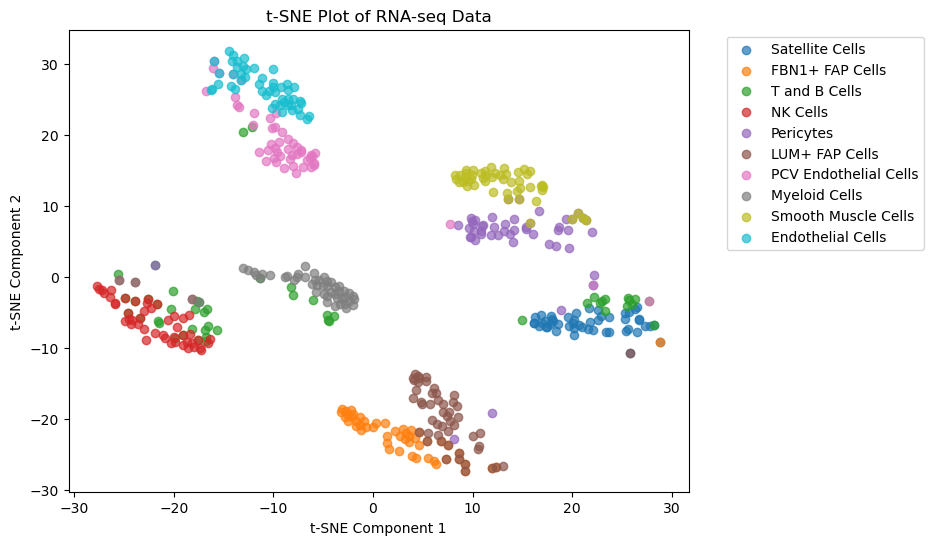

In [24]:
# Plot t-SNE colored by cell type
plt.figure(figsize=(8, 6))
for cell_type in tsne_df['cell_type'].unique():
    plt.scatter(tsne_df.loc[tsne_df['cell_type'] == cell_type, 'tsne1'],
                tsne_df.loc[tsne_df['cell_type'] == cell_type, 'tsne2'],
                label=cell_type, alpha=0.7)
plt.title('t-SNE Plot of RNA-seq Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
# Assign each sample to a variable and rename column: "Unnamed: 0" to "Gene"
sample1 = muscles[0]
sample2 = muscles[1]
sample3 = muscles[2]
sample4 = muscles[3]

sample1.rename(columns = {'Unnamed: 0': 'Gene'}, inplace = True)
sample2.rename(columns = {'Unnamed: 0': 'Gene'}, inplace = True)
sample3.rename(columns = {'Unnamed: 0': 'Gene'}, inplace = True)
sample4.rename(columns = {'Unnamed: 0': 'Gene'}, inplace = True)

In [26]:
# Filter out low gene counts
columns_to_sum = sample1.columns[1:]
sums = sample1[columns_to_sum].sum(axis=1)
sample1 = sample1[sums > 80]

columns_to_sum = sample2.columns[1:]
sums = sample2[columns_to_sum].sum(axis=1)
sample2 = sample2[sums > 80]

columns_to_sum = sample3.columns[1:]
sums = sample3[columns_to_sum].sum(axis=1)
sample3 = sample3[sums > 80]

columns_to_sum = sample4.columns[1:]
sums = sample4[columns_to_sum].sum(axis=1)
sample4 = sample4[sums > 80]

In [27]:
# Merge each sample data with file containing cell types
sample1 = sample1.merge(celltypes, on = 'Gene')
sample2 = sample2.merge(celltypes, on = 'Gene')
sample3 = sample3.merge(celltypes, on = 'Gene')
sample4 = sample4.merge(celltypes, on = 'Gene')

In [28]:
# Get values of how many of each cell type are in each sample and store as dictionaries
sample1_counts = (sample1['Cell-type'].value_counts()).to_dict()
sample2_counts = (sample2['Cell-type'].value_counts()).to_dict()
sample3_counts = (sample3['Cell-type'].value_counts()).to_dict()
sample4_counts = (sample4['Cell-type'].value_counts()).to_dict()

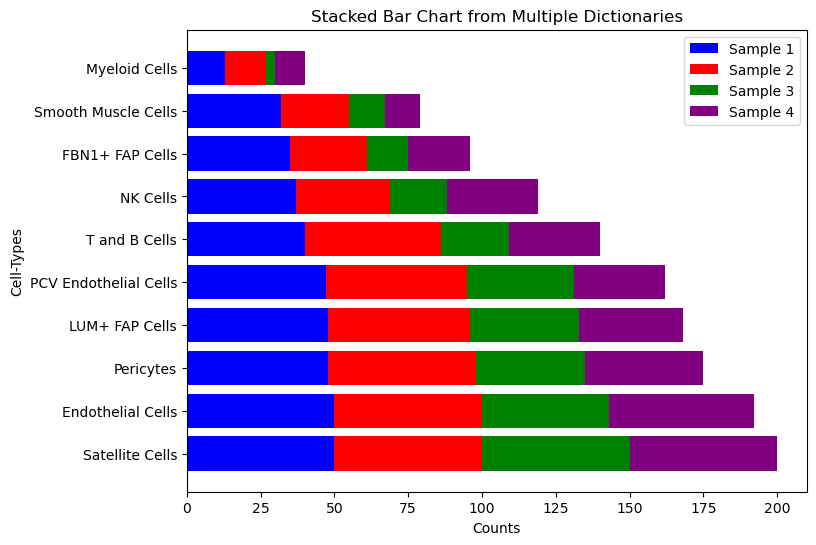

In [29]:
# Plot the keys and values of the dictionaries on a bar chart, color by sample
keys = list(sample1_counts.keys())
values1 = list(sample1_counts.values())
values2 = list(sample2_counts.values())
values3 = list(sample3_counts.values())
values4 = list(sample4_counts.values())

plt.figure(figsize=(8, 6))

plt.barh(keys, values1, color='blue', label='Sample 1')
plt.barh(keys, values2, color='red', label='Sample 2', left = values1)
plt.barh(keys, values3, color='green', label='Sample 3', left = np.add(values1,values2))
plt.barh(keys, values4, color='purple', label='Sample 4', left = np.add(np.add(values1, values2), values3))

plt.xlabel('Counts')
plt.ylabel('Cell-Types')
plt.title('Stacked Bar Chart from Multiple Dictionaries')
plt.legend()
plt.show()